In [1]:
import os
import pandas as pd

RESULT_DIR = '/media/ponbac/BigHDD/ethereum'

In [2]:
known_addresses = pd.read_csv(f'{RESULT_DIR}/known-addresses.csv')

flagged: pd.DataFrame = known_addresses[known_addresses.legitimacy == 0]
print(f'found {len(flagged)} addresses flagged as illegitimate.')
pre_flagged = len(flagged)

found 5204 addresses flagged as illegitimate.


In [3]:
POISON_DIR = f'{RESULT_DIR}/blacklist/poison'

FLAGGED_RESULT = f'{POISON_DIR}/poison-flagged-result.csv'
FLAGGED_RUNDATA = f'{POISON_DIR}/poison-flagged-rundata.csv'
poison_flagged_rundata = pd.read_csv(FLAGGED_RUNDATA, dtype={'chunk': int})
poison_flagged_rundata['algorithm'] = 'Poison (Flagged)'

TORNADO_RESULT = f'{POISON_DIR}/poison-tornado-result.csv'
TORNADO_RUNDATA = f'{POISON_DIR}/poison-tornado-rundata.csv'
poison_tornado_rundata = pd.read_csv(TORNADO_RUNDATA, dtype={'chunk': int})
poison_tornado_rundata['algorithm'] = 'Poison (Tornado)'

In [4]:
HAIRCUT_DIR = f'{RESULT_DIR}/blacklist/haircut'

FLAGGED_RESULT = f'{HAIRCUT_DIR}/haircut-flagged-result.csv'
FLAGGED_RUNDATA = f'{HAIRCUT_DIR}/haircut-flagged-rundata.csv'
haircut_flagged_rundata = pd.read_csv(FLAGGED_RUNDATA)
haircut_flagged_rundata['algorithm'] = 'Haircut (Flagged)'

TORNADO_RESULT = f'{HAIRCUT_DIR}/haircut-tornado-result.csv'
TORNADO_RUNDATA = f'{HAIRCUT_DIR}/haircut-tornado-rundata.csv'
haircut_tornado_rundata = pd.read_csv(TORNADO_RUNDATA)
haircut_tornado_rundata['algorithm'] = 'Haircut (Tornado)'

In [5]:
from csv import reader

with open(FLAGGED_RESULT ,'r') as read_obj:
    csv_reader = reader(read_obj)
    
    threshold_0 = 0
    threshold_0001 = 0.001
    threshold_001 = 0.01
    threshold_01 = 0.1
    threshold_05 = 0.5
    threshold_1 = 1
    threshold_2 = 2
    threshold_5 = 5
    threshold_10 = 10
    threshold_50 = 50
    threshold_100 = 100
    threshold_500 = 500
    threshold_1000 = 1000
    threshold_5000 = 5000
    threshold_10000 = 10000
    threshold_50000 = 50000
    threshold_100000 = 100000

    total = 0
    count_0 = 0
    count_0001 = 0
    count_001 = 0
    count_01 = 0
    count_05 = 0
    count_1 = 0
    count_2 = 0
    count_5 = 0
    count_10 = 0
    count_50 = 0
    count_100 = 0
    count_500 = 0
    count_1000 = 0
    count_5000 = 0
    count_10000 = 0
    count_50000 = 0
    count_100000 = 0
    for i, row in enumerate(csv_reader):
        if i == 0:
            continue
        balance = float(row[1])
        #taint = balance * float(row[2]) / 1e18
        taint = float(row[1]) / 1e18
        
        if taint >= threshold_0:
            count_0 += 1
        if taint >= threshold_0001:
            count_0001 += 1
        if taint >= threshold_001:
            count_001 += 1
        if taint >= threshold_01:
            count_01 += 1
        if taint >= threshold_05:
            count_05 += 1
        if taint >= threshold_1:
            count_1 += 1
        if taint >= threshold_2:
            count_2 += 1
        if taint >= threshold_5:
            count_5 += 1
        if taint >= threshold_10:
            count_10 += 1
        if taint >= threshold_50:
            count_50 += 1
        if taint >= threshold_100:
            count_100 += 1
        if taint >= threshold_500:
            count_500 += 1
        if taint >= threshold_1000:
            count_1000 += 1
        if taint >= threshold_5000:
            count_5000 += 1
        if taint >= threshold_10000:
            count_10000 += 1
        if taint >= threshold_50000:
            count_50000 += 1
        if taint >= threshold_100000:
            count_100000 += 1
        total += 1

    count_0 -= pre_flagged
    count_0001 -= pre_flagged
    count_001 -= pre_flagged
    count_01 -= pre_flagged
    count_05 -= pre_flagged
    count_1 -= pre_flagged
    count_2 -= pre_flagged
    count_5 -= pre_flagged
    count_10 -= pre_flagged
    count_50 -= pre_flagged
    count_100 -= pre_flagged
    count_500 -= pre_flagged
    count_1000 -= pre_flagged
    count_5000 -= pre_flagged
    count_10000 -= pre_flagged
    count_50000 -= pre_flagged
    count_100000 -= pre_flagged

    print(
        f'Found {count_0:,} accounts with more than {threshold_0} tainted ETH')
    print(
        f'Found {count_0001:,} accounts with more than {threshold_0001} tainted ETH')
    print(
        f'Found {count_001:,} accounts with more than {threshold_001} tainted ETH')
    print(
        f'Found {count_01:,} accounts with more than {threshold_01} tainted ETH')
    print(
        f'Found {count_05:,} accounts with more than {threshold_05} tainted ETH')
    print(
        f'Found {count_1:,} accounts with more than {threshold_1} tainted ETH')
    print(
        f'Found {count_2:,} accounts with more than {threshold_2} tainted ETH')
    print(
        f'Found {count_5:,} accounts with more than {threshold_5} tainted ETH')
    print(
        f'Found {count_10:,} accounts with more than {threshold_10} tainted ETH')
    print(
        f'Found {count_50:,} accounts with more than {threshold_50} tainted ETH')
    print(
        f'Found {count_100:,} accounts with more than {threshold_100} tainted ETH')
    print(
        f'Found {count_500:,} accounts with more than {threshold_500} tainted ETH')
    print(
        f'Found {count_1000:,} accounts with more than {threshold_1000:,} tainted ETH')
    print(
        f'Found {count_5000:,} accounts with more than {threshold_5000:,} tainted ETH')
    print(
        f'Found {count_10000:,} accounts with more than {threshold_10000:,} tainted ETH')
    print(
        f'Found {count_50000:,} accounts with more than {threshold_50000:,} tainted ETH')
    print(
        f'Found {count_100000:,} accounts with more than {threshold_100000:,} tainted ETH')

Found 151,588,549 accounts with more than 0 tainted ETH
Found 104,607,356 accounts with more than 0.001 tainted ETH
Found 43,251,963 accounts with more than 0.01 tainted ETH
Found 12,705,814 accounts with more than 0.1 tainted ETH
Found 5,497,196 accounts with more than 0.5 tainted ETH
Found 4,043,642 accounts with more than 1 tainted ETH
Found 2,997,379 accounts with more than 2 tainted ETH
Found 1,903,732 accounts with more than 5 tainted ETH
Found 1,031,657 accounts with more than 10 tainted ETH
Found 153,678 accounts with more than 50 tainted ETH
Found 73,760 accounts with more than 100 tainted ETH
Found 14,702 accounts with more than 500 tainted ETH
Found 7,061 accounts with more than 1,000 tainted ETH
Found 1,500 accounts with more than 5,000 tainted ETH
Found 876 accounts with more than 10,000 tainted ETH
Found 257 accounts with more than 50,000 tainted ETH
Found 137 accounts with more than 100,000 tainted ETH


In [6]:
SENIORITY_DIR = f'{RESULT_DIR}/blacklist/seniority'

FLAGGED_RESULT = f'{SENIORITY_DIR}/seniority-flagged-result.csv'
FLAGGED_RUNDATA = f'{SENIORITY_DIR}/seniority-flagged-rundata.csv'
seniority_flagged_rundata = pd.read_csv(FLAGGED_RUNDATA)
seniority_flagged_rundata['algorithm'] = 'Seniority (Flagged)'

TORNADO_RESULT = f'{SENIORITY_DIR}/seniority-tornado-result.csv'
TORNADO_RUNDATA = f'{SENIORITY_DIR}/seniority-tornado-rundata.csv'
seniority_tornado_rundata = pd.read_csv(TORNADO_RUNDATA)
seniority_tornado_rundata['algorithm'] = 'Seniority (Tornado)'

In [7]:
from csv import reader

with open(FLAGGED_RESULT, 'r') as read_obj:
    csv_reader = reader(read_obj)

    threshold_0 = 0
    threshold_01 = 0.1
    threshold_05 = 0.5
    threshold_1 = 1
    threshold_2 = 2
    threshold_5 = 5
    threshold_10 = 10
    threshold_50 = 50
    threshold_100 = 100
    threshold_500 = 500
    threshold_1000 = 1000
    threshold_5000 = 5000
    threshold_10000 = 10000
    threshold_50000 = 50000
    threshold_100000 = 100000

    total = 0
    count_0 = 0
    count_01 = 0
    count_05 = 0
    count_1 = 0
    count_2 = 0
    count_5 = 0
    count_10 = 0
    count_50 = 0
    count_100 = 0
    count_500 = 0
    count_1000 = 0
    count_5000 = 0
    count_10000 = 0
    count_50000 = 0
    count_100000 = 0
    for i, row in enumerate(csv_reader):
        if i == 0:
            continue
        row[1] = float(row[1]) / 10**18
        if row[1] > threshold_0:
            count_0 += 1
        if row[1] > threshold_01:
            count_01 += 1
        if row[1] > threshold_05:
            count_05 += 1
        if row[1] > threshold_1:
            count_1 += 1
        if row[1] > threshold_2:
            count_2 += 1
        if row[1] > threshold_5:
            count_5 += 1
        if row[1] > threshold_10:
            count_10 += 1
        if row[1] > threshold_50:
            count_50 += 1
        if row[1] > threshold_100:
            count_100 += 1
        if row[1] > threshold_500:
            count_500 += 1
        if row[1] > threshold_1000:
            count_1000 += 1
        if row[1] > threshold_5000:
            count_5000 += 1
        if row[1] > threshold_10000:
            count_10000 += 1
        if row[1] > threshold_50000:
            count_50000 += 1
        if row[1] > threshold_100000:
            count_100000 += 1
        total += 1

    count_0 -= pre_flagged
    count_01 -= pre_flagged
    count_05 -= pre_flagged
    count_1 -= pre_flagged
    count_2 -= pre_flagged
    count_5 -= pre_flagged
    count_10 -= pre_flagged
    count_50 -= pre_flagged
    count_100 -= pre_flagged
    count_500 -= pre_flagged
    count_1000 -= pre_flagged
    count_5000 -= pre_flagged
    count_10000 -= pre_flagged
    count_50000 -= pre_flagged
    count_100000 -= pre_flagged

    print(
        f'Found {count_0:,} accounts with more than {threshold_0} ETH')
    print(
        f'Found {count_01:,} accounts with more than {threshold_01} ETH')
    print(
        f'Found {count_05:,} accounts with more than {threshold_05} ETH')
    print(
        f'Found {count_1:,} accounts with more than {threshold_1} ETH')
    print(
        f'Found {count_2:,} accounts with more than {threshold_2} ETH')
    print(
        f'Found {count_5:,} accounts with more than {threshold_5} ETH')
    print(
        f'Found {count_10:,} accounts with more than {threshold_10} ETH')
    print(
        f'Found {count_50:,} accounts with more than {threshold_50} ETH')
    print(
        f'Found {count_100:,} accounts with more than {threshold_100} ETH')
    print(
        f'Found {count_500:,} accounts with more than {threshold_500} ETH')
    print(
        f'Found {count_1000:,} accounts with more than {threshold_1000:,} ETH')
    print(
        f'Found {count_5000:,} accounts with more than {threshold_5000:,} ETH')
    print(
        f'Found {count_10000:,} accounts with more than {threshold_10000:,} ETH')
    print(
        f'Found {count_50000:,} accounts with more than {threshold_50000:,} ETH')
    print(
        f'Found {count_100000:,} accounts with more than {threshold_100000:,} ETH')


Found 57,280,323 accounts with more than 0 ETH
Found 7,259,514 accounts with more than 0.1 ETH
Found 3,564,506 accounts with more than 0.5 ETH
Found 2,479,873 accounts with more than 1 ETH
Found 1,666,064 accounts with more than 2 ETH
Found 812,847 accounts with more than 5 ETH
Found 376,385 accounts with more than 10 ETH
Found 49,671 accounts with more than 50 ETH
Found 23,742 accounts with more than 100 ETH
Found 4,966 accounts with more than 500 ETH
Found 2,535 accounts with more than 1,000 ETH
Found 632 accounts with more than 5,000 ETH
Found 371 accounts with more than 10,000 ETH
Found 81 accounts with more than 50,000 ETH
Found 42 accounts with more than 100,000 ETH


AttributeError: 'AxesSubplot' object has no attribute 'xscale'

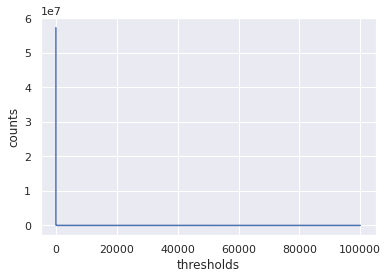

In [10]:
import seaborn as sns

# Set the style and color palette
sns.set(style="darkgrid")

# Create a list of thresholds
thresholds = [0, 0.1, 0.5, 1, 2, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

# Create a list of counts for each threshold
counts = [count_0, count_01, count_05, count_1, count_2, count_5, count_10, count_50, count_100, count_500, count_1000, count_5000, count_10000, count_50000, count_100000]

data = pd.DataFrame({'thresholds': thresholds, 'counts': counts})

# Plot the data with log scaling
plt = sns.lineplot(x="thresholds", y="counts", data=data)
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()

[Text(0.5, 1.0, 'Addresses blacklisted over time'),
 Text(0.5, 0, 'Block number'),
 Text(0, 0.5, '# of addresses blacklisted')]

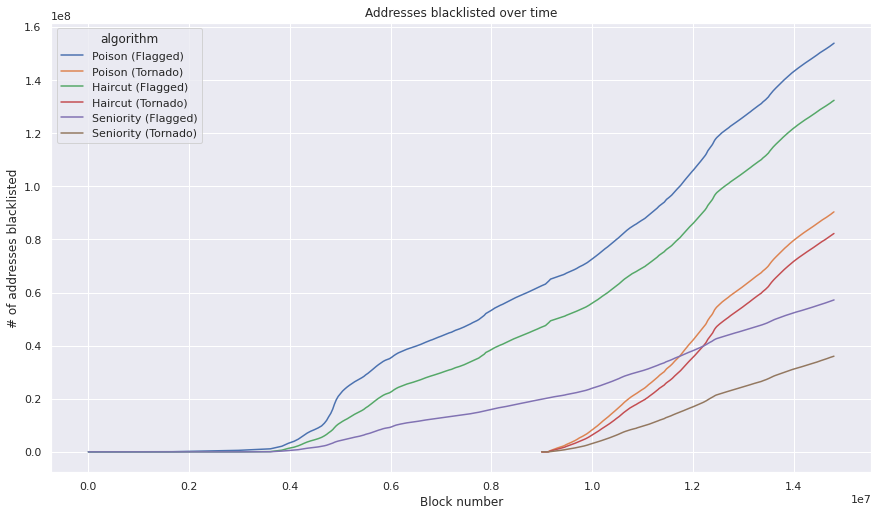

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

# Combine rundata
rundata = pd.concat([poison_flagged_rundata, poison_tornado_rundata])
rundata = pd.concat([rundata, haircut_flagged_rundata])
rundata = pd.concat([rundata, haircut_tornado_rundata])
rundata = pd.concat([rundata, seniority_flagged_rundata])
rundata = pd.concat([rundata, seniority_tornado_rundata])
rundata = rundata.reset_index(drop=True)

# Create a visualization
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (14.7, 8.27)})
sns.lineplot(x='max_block', y='n_blacklisted', hue='algorithm',
             data=rundata).set(title='Addresses blacklisted over time', xlabel='Block number', ylabel='# of addresses blacklisted')

In [ ]:
sns.lineplot(x='max_block', y='ram_usage_gb', hue='algorithm',
             data=rundata).set(title='RAM usage over time', xlabel='Block number', ylabel='RAM used (GB)')

In [ ]:
rundata.processed_after = rundata.processed_after.apply(lambda x: (int(x.split(' ')[2].split(':')[0]) * 60 + int(x.split(' ')[2].split(':')[1])) / 60)
sns.lineplot(x='max_block', y='processed_after', hue='algorithm', data=rundata).set(title='Time to reach block', xlabel='Block number', ylabel='Processed after (hours)')

# Haircut stuff

In [ ]:
import pandas as pd
from tqdm import tqdm

RESULT_DIR = '/media/ponbac/BigHDD/ethereum'
HAIRCUT_DIR = f'{RESULT_DIR}/blacklist/haircut'
FLAGGED_RESULT = f'{HAIRCUT_DIR}/haircut-flagged-result.csv'
TORNADO_RESULT = f'{HAIRCUT_DIR}/haircut-tornado-result.csv'

CHUNK_SIZE = 100000
#flagged_iter = pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE)
#tornado_iter = pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE)

def calc_addresses_over_threshold(iter, threshold: float, chunk_size=100000, n_iter=984, isWei=False):
    THRESHOLD_ETH = threshold
    addresses_over_threshold = 0
    pbar = tqdm(total=n_iter)
    for chunk in iter:
        if isWei:
            chunk = chunk[chunk['taint'] / 10**18 > THRESHOLD_ETH]
        else:
            chunk = chunk[chunk['taint'] > THRESHOLD_ETH]
        addresses_over_threshold += len(chunk)
        pbar.update(1)
    pbar.close()
    print(f'Addresses over {THRESHOLD_ETH} ETH: {addresses_over_threshold}')

print('Flagged')
calc_addresses_over_threshold(pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE), 0.001, n_iter=1516)
calc_addresses_over_threshold(pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE), 0.01, n_iter=1516)
calc_addresses_over_threshold(pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE), 0.1, n_iter=1516)
calc_addresses_over_threshold(pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE), 1, n_iter=1516)

print('\nTornado')
calc_addresses_over_threshold(pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE), 0.001, n_iter=984)
calc_addresses_over_threshold(pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE), 0.01, n_iter=984)
calc_addresses_over_threshold(pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE), 0.1, n_iter=984)
calc_addresses_over_threshold(pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE), 1, n_iter=984)

# Seniority stuff

In [ ]:
import pandas as pd
from tqdm import tqdm

RESULT_DIR = '/media/ponbac/BigHDD/ethereum'
SENIORITY_DIR = f'{RESULT_DIR}/blacklist/seniority'
FLAGGED_RESULT = f'{SENIORITY_DIR}/seniority-flagged-result.csv'
TORNADO_RESULT = f'{SENIORITY_DIR}/seniority-tornado-result.csv'

CHUNK_SIZE = 100_000

print('Flagged')
calc_addresses_over_threshold(pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE), 0.001, n_iter=573, isWei=True)
calc_addresses_over_threshold(pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE), 0.01, n_iter=573, isWei=True)
calc_addresses_over_threshold(pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE), 0.1, n_iter=573, isWei=True)
calc_addresses_over_threshold(pd.read_csv(FLAGGED_RESULT, chunksize=CHUNK_SIZE), 1, n_iter=573, isWei=True)

print('\nTornado')
calc_addresses_over_threshold(pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE), 0.001, n_iter=362, isWei=True)
calc_addresses_over_threshold(pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE), 0.01, n_iter=362, isWei=True)
calc_addresses_over_threshold(pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE), 0.1, n_iter=362, isWei=True)
calc_addresses_over_threshold(pd.read_csv(TORNADO_RESULT, chunksize=CHUNK_SIZE), 1, n_iter=362, isWei=True)